In [ ]:
!pip install tensorflow>=2.2

In [ ]:
import keras

In [ ]:
import seaborn as sns
import pandas as pd
import pylab as pl

import yaml
from nnaps import predictors

In [ ]:
data = pd.read_csv('../data/raw/ampl_sdB_dM_mesa.csv')

In [ ]:
data

,a_final,P_final,M1_final,rad_HeCoreBurning,teff_HeCoreBurning,M2_final,rad2_MLstart,teff2_MLstart,amplitude
0,2.515527,0.512270,0.468122,0.221752,24343.066406,0.761533,0.694496,4720.770786,0.413922
1,1.018071,0.105038,0.473196,0.156340,29748.812500,0.306697,0.257583,3918.929956,0.335153
2,2.013954,0.323505,0.466393,0.151741,29253.121094,0.489229,0.417315,3901.130425,0.417360
3,2.312392,0.486347,0.456668,0.165820,27393.785156,0.970193,0.873626,5342.453197,0.608605
4,0.949163,0.095400,0.463954,0.130611,31671.626953,0.329908,0.304054,3841.225688,0.547608
...,...,...,...,...,...,...,...,...,...
1709,21.910150,11.354208,0.485315,0.927889,13663.363281,0.428905,0.343618,3829.646934,0.001030
1710,24.445874,16.267565,0.475844,0.966097,14345.079102,0.875299,0.786119,5370.731449,0.002412
1711,11.583554,4.038407,0.465671,0.465092,17244.085938,0.316979,0.280051,3712.717574,0.002730
1712,16.876267,8.813212,0.455837,0.584759,16163.333008,0.749510,0.675867,4514.085777,0.005555


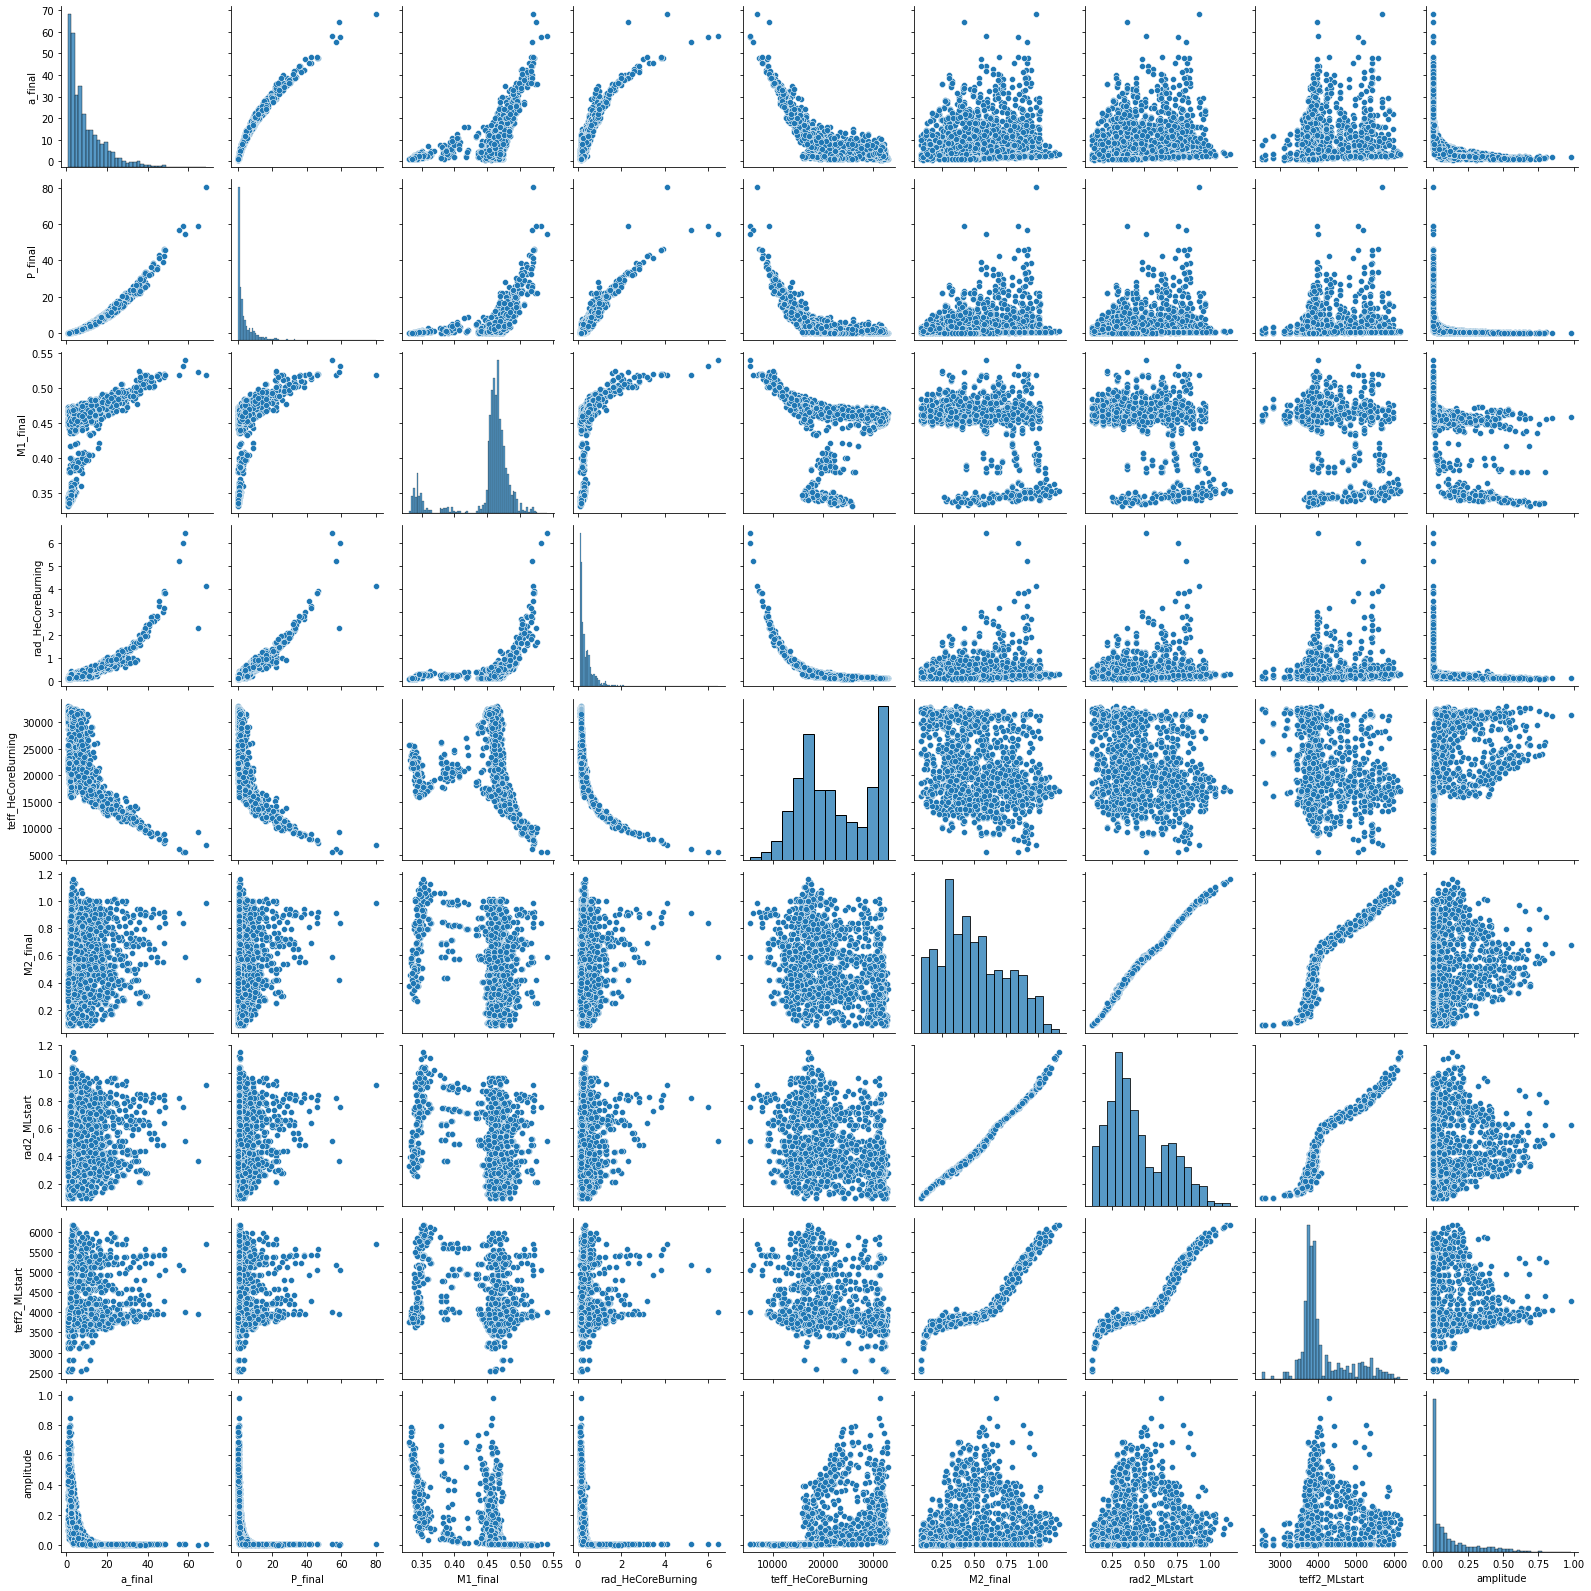

In [ ]:
sns.pairplot(data)

In [ ]:
data.columns

Index(['a_final', 'P_final', 'M1_final', 'rad_HeCoreBurning',
       'teff_HeCoreBurning', 'M2_final', 'rad2_MLstart', 'teff2_MLstart',
       'amplitude'],
      dtype='object')

In [ ]:
setup = """
features: 
    - P_final
    - M1_final
    - teff_HeCoreBurning
    - M2_final
regressors:
    - amplitude
classifiers: []
model:
   - {'layer':'Dense',   'args':[200], 'kwargs': {'activation':'relu', 'name':'FC_1'} }
   - {'layer':'Dense',   'args':[150], 'kwargs': {'activation':'relu', 'name':'FC_2'} }
   - {'layer':'Dense',   'args':[100], 'kwargs': {'activation':'relu', 'name':'FC_3'} }
   - {'layer':'Dense',   'args':[50],  'kwargs': {'activation':'relu', 'name':'FC_4'} }
   
optimizer: adam
"""
setup = yaml.safe_load(setup)

In [ ]:
predictor = predictors.FCPredictor(setup=setup, data=data)

In [ ]:
predictor.fit(epochs=100, batch_size=128, reduce_lr=True)

Epoch 1/100
11/11 - 0s - loss: 0.0220 - mae: 0.0980 - val_loss: 0.0105 - val_mae: 0.0668
Epoch 2/100
11/11 - 0s - loss: 0.0077 - mae: 0.0554 - val_loss: 0.0084 - val_mae: 0.0527
Epoch 3/100
11/11 - 0s - loss: 0.0062 - mae: 0.0468 - val_loss: 0.0073 - val_mae: 0.0517
Epoch 4/100
11/11 - 0s - loss: 0.0051 - mae: 0.0398 - val_loss: 0.0059 - val_mae: 0.0451
Epoch 5/100
11/11 - 0s - loss: 0.0045 - mae: 0.0373 - val_loss: 0.0054 - val_mae: 0.0372
Epoch 6/100
11/11 - 0s - loss: 0.0042 - mae: 0.0357 - val_loss: 0.0053 - val_mae: 0.0343
Epoch 7/100
11/11 - 0s - loss: 0.0040 - mae: 0.0348 - val_loss: 0.0042 - val_mae: 0.0345
Epoch 8/100
11/11 - 0s - loss: 0.0035 - mae: 0.0322 - val_loss: 0.0040 - val_mae: 0.0341
Epoch 9/100
11/11 - 0s - loss: 0.0034 - mae: 0.0307 - val_loss: 0.0037 - val_mae: 0.0344
Epoch 10/100
11/11 - 0s - loss: 0.0035 - mae: 0.0343 - val_loss: 0.0043 - val_mae: 0.0308
Epoch 11/100
11/11 - 0s - loss: 0.0032 - mae: 0.0305 - val_loss: 0.0033 - val_mae: 0.0320
Epoch 12/100
11/11 

Training results
target           mean  training score   test score
--------------------------------------------------
amplitude   :    0.115        0.011        0.014


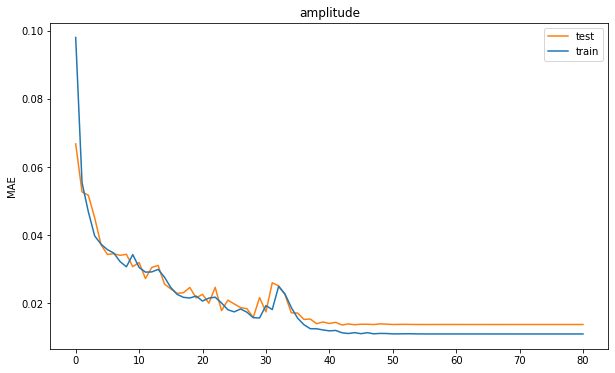

In [ ]:
pl.figure(figsize=(10,6))
predictor.print_score()
predictor.plot_training_history()